## Audience Segmentation

In this project, you will learn how to apply machine learning techniques for audience segmentation, a critical skill for targeting the right customers in the financial services industry. Using customer behavior data—such as demographics, ad engagement, online purchase behavior, and more—you will perform unsupervised learning to identify distinct customer segments. 

You will work with clustering algorithms like K-Means and DBSCAN, experimenting with hyperparameter tuning to optimize model performance. 

Through this process, you will learn how to interpret clusters, define high-value customer criteria, and use the results to create actionable marketing strategies. 

By the end of the project, you'll gain hands-on experience in data preprocessing, feature engineering, model fitting, and evaluating the impact of segmentation for customer acquisition.

In [1]:
# These are package to be loaded
# Do not alter

%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

## Task 1 : Load the dataset into your environment.
Load the dataset and inspect its basic structure. Pay attention to the data types of each column and check for any obvious issues (e.g., columns that should be numeric but are categorical).

In [2]:
# Load the dataset
dataset = pd.read_csv("audience_targeting_dataset.csv")

# Display the first few rows of the dataset to understand its structure
print(dataset.head())

# Check for data types of each column
print(dataset.dtypes)

# Check for any missing values
print(dataset.isnull().sum())

# Get a summary of the dataset (like count, mean, std for numeric columns)
print(dataset.describe())


  Age Range      Gender    Location Language    Interest Device Type  \
0     45-54      Female       Texas  Chinese      Travel      Mobile   
1     35-44        Male       Texas    Hindi      Gaming     Desktop   
2     18-24      Female       Texas   French     Fitness      Mobile   
3     45-54      Female     Florida  Spanish        Food      Mobile   
4       55+  Non-binary  California  Spanish  Technology      Mobile   

  Online Purchase Behavior  Ad Engagement (Clicks/Views)  \
0                     Rare                            11   
1                 Frequent                            72   
2                 Frequent                            16   
3                 Frequent                            58   
4                 Frequent                            66   

   Time Spent on Platform (mins)  Page Likes  Ad Impressions  \
0                           25.9           9              11   
1                            6.8           6              41   
2             

## Task 2 -  Explore the distribution of each feature.

For numerical features, check how they are distributed (e.g., normal, skewed). For categorical features, see how frequently each category occurs. Visualizations like histograms and bar plots should help you here.

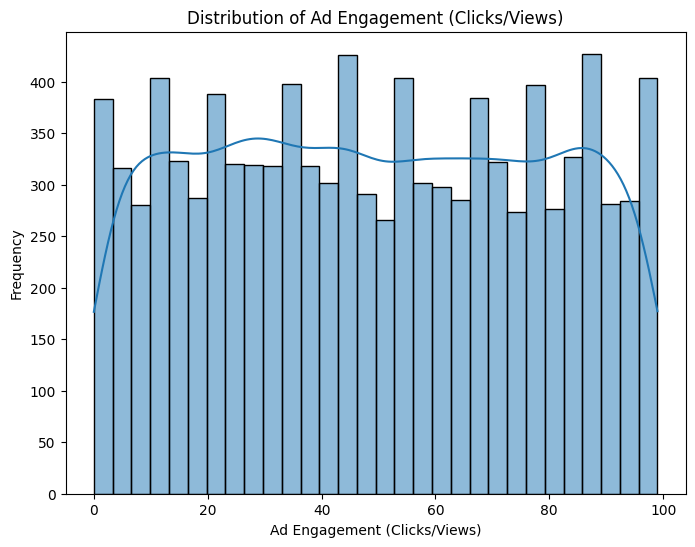

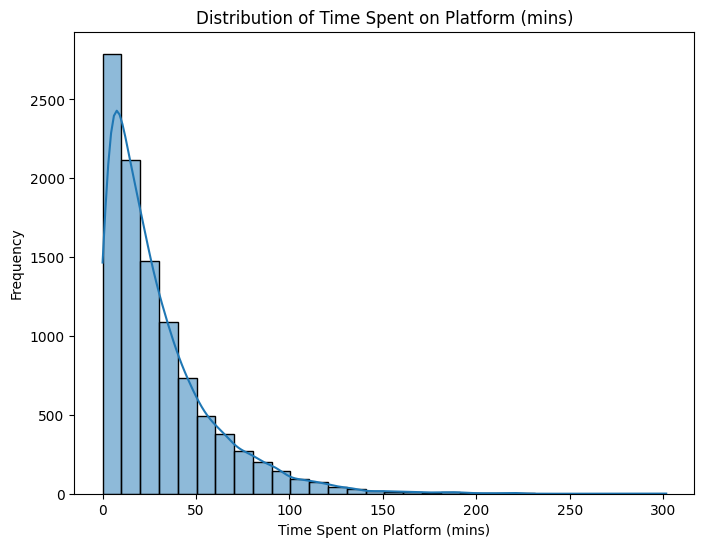

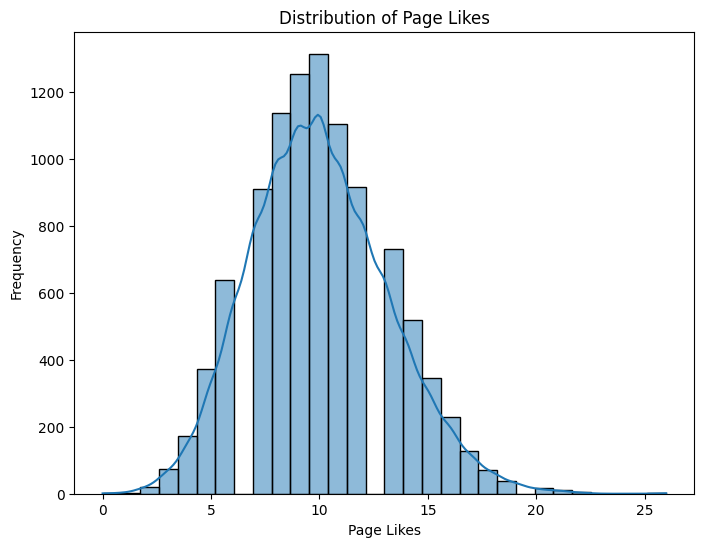

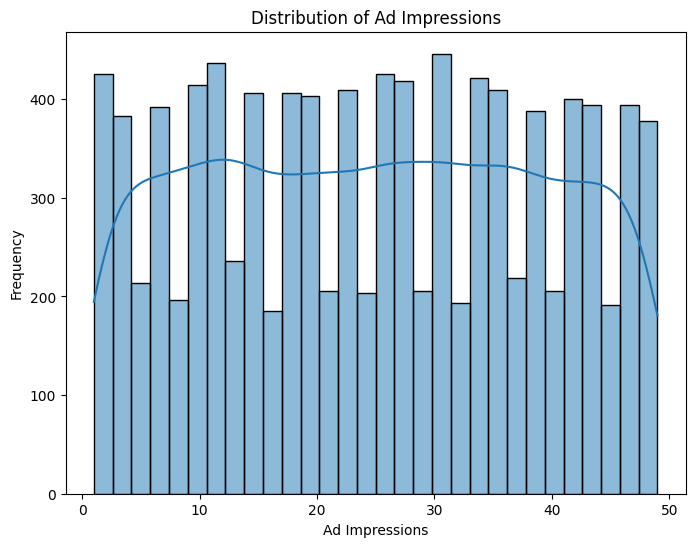

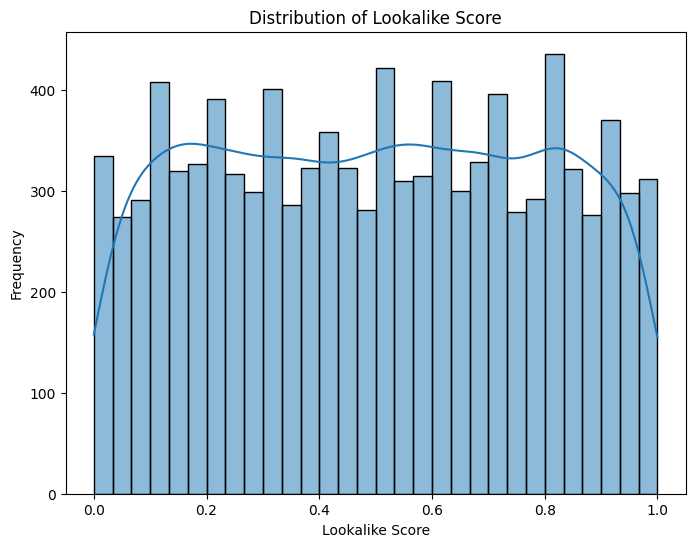

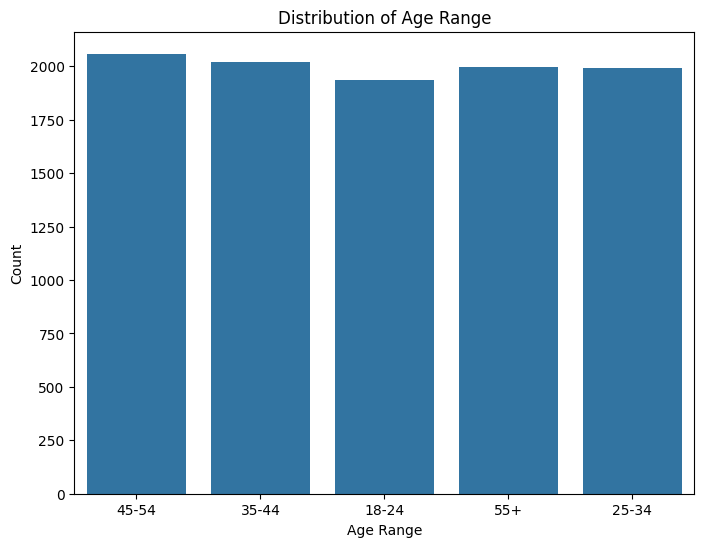

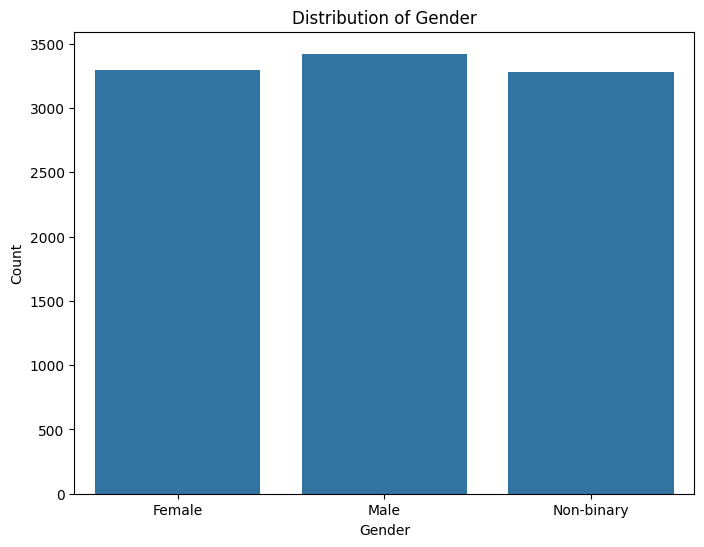

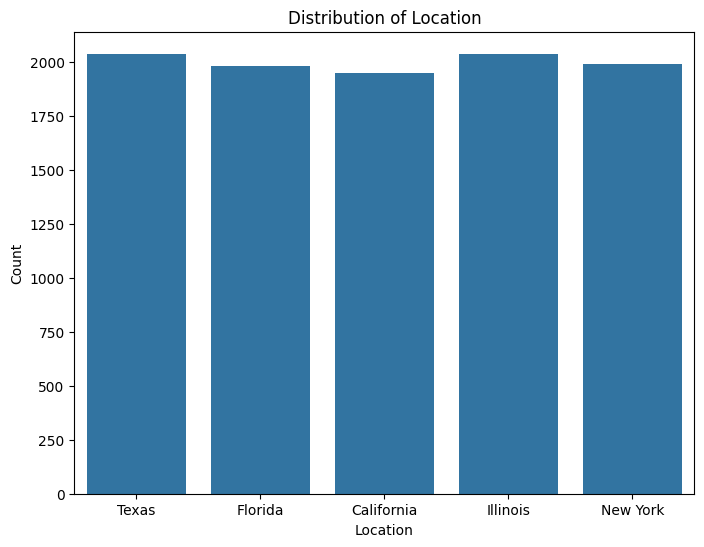

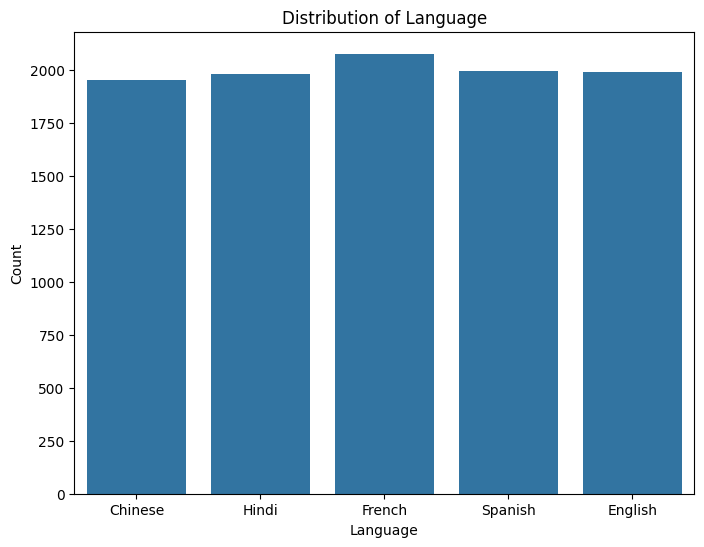

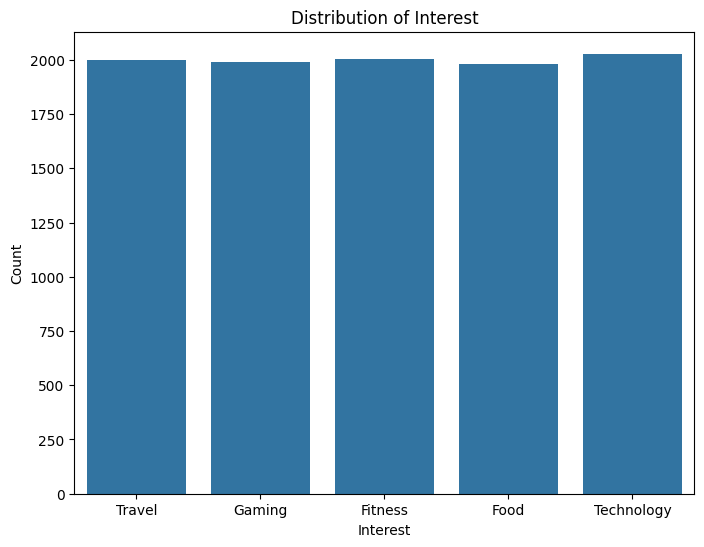

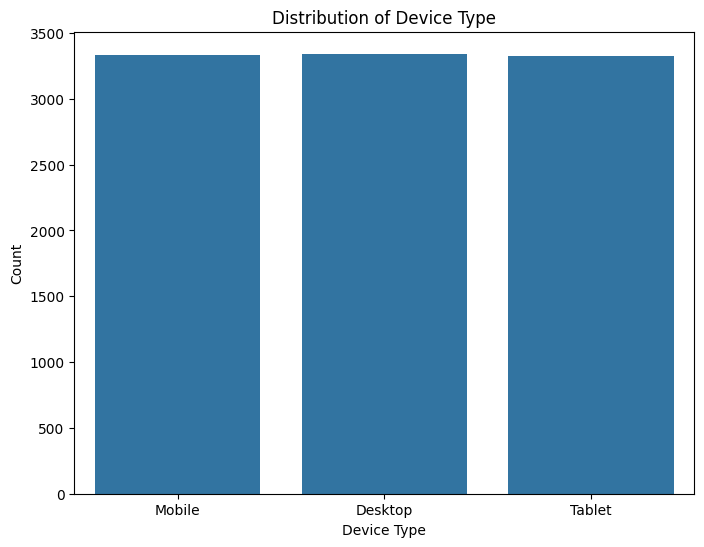

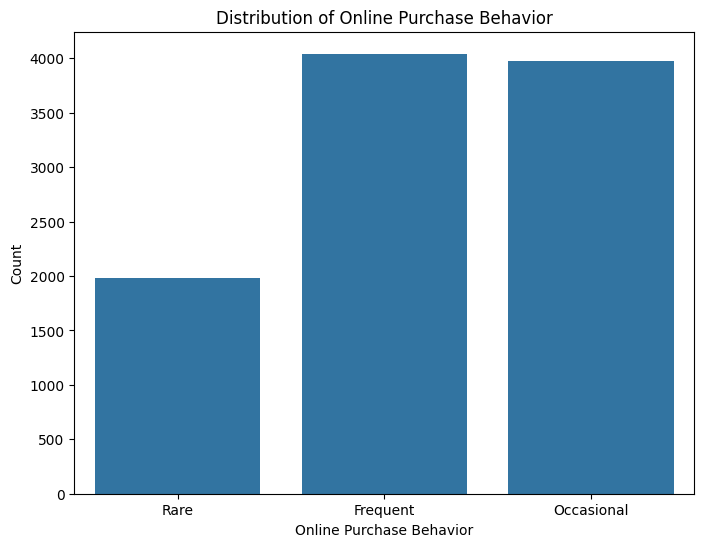

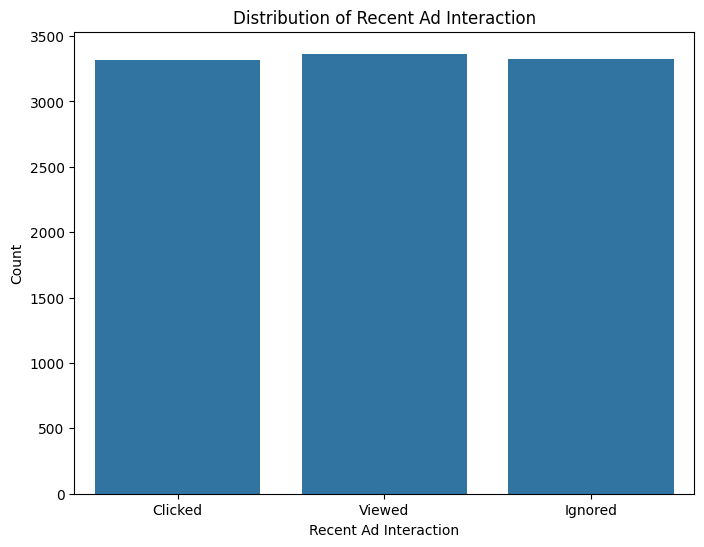

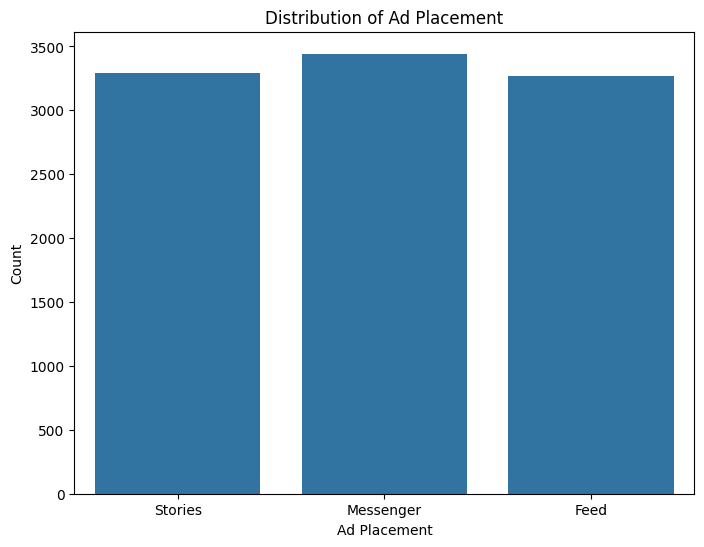

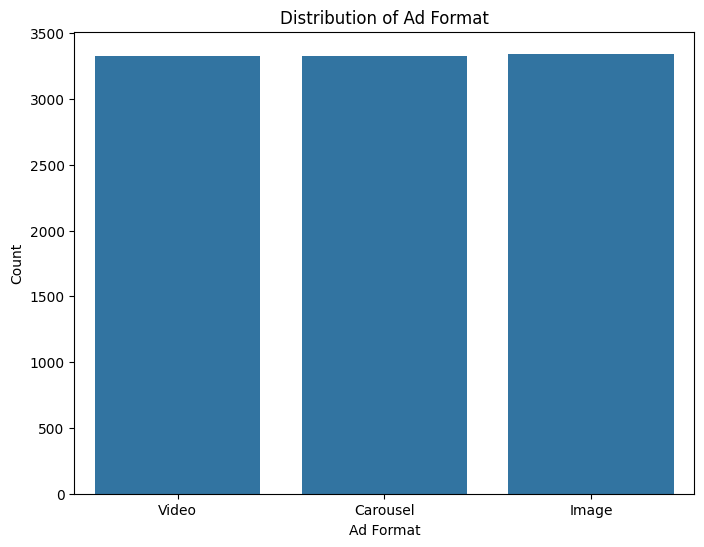

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numerical and categorical features based on your dataset
numeric_features = ['Ad Engagement (Clicks/Views)', 'Time Spent on Platform (mins)', 
                    'Page Likes', 'Ad Impressions', 'Lookalike Score']  # Example numerical columns

categorical_features = ['Age Range', 'Gender', 'Location', 'Language', 'Interest', 
                        'Device Type', 'Online Purchase Behavior', 'Recent Ad Interaction', 
                        'Ad Placement', 'Ad Format']  # Example categorical columns

# Visualize the distribution of numerical features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Visualize the distribution of categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=dataset[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


## Task 3 -  Assess the data for missing values, duplicates, and outliers.

Look for any missing values and handle them appropriately (removal or imputation). Identify and remove any duplicates. For numerical features, check for outliers that could affect the results.

In [4]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(f"Missing Values per Feature:\n{missing_values}\n")

# Handle missing values - You can choose to drop or fill them
# Example: Dropping rows with missing values
dataset_cleaned = dataset.dropna()

# Alternatively, you can fill missing values (e.g., with mean or mode)
# dataset['Ad Impressions'] = dataset['Ad Impressions'].fillna(dataset['Ad Impressions'].mean())

# Check for duplicates
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if found
dataset_cleaned = dataset_cleaned.drop_duplicates()

# Checking for outliers (for numerical features)
# Using IQR (Interquartile Range) method to detect outliers
Q1 = dataset_cleaned[numeric_features].quantile(0.25)
Q3 = dataset_cleaned[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as data points outside of 1.5*IQR range
outliers = ((dataset_cleaned[numeric_features] < (Q1 - 1.5 * IQR)) | 
            (dataset_cleaned[numeric_features] > (Q3 + 1.5 * IQR)))

# Count outliers for each feature
outliers_count = outliers.sum()
print(f"Outliers detected in each numerical feature:\n{outliers_count}")


Missing Values per Feature:
Age Range                        0
Gender                           0
Location                         0
Language                         0
Interest                         0
Device Type                      0
Online Purchase Behavior         0
Ad Engagement (Clicks/Views)     0
Time Spent on Platform (mins)    0
Page Likes                       0
Ad Impressions                   0
Recent Ad Interaction            0
Ad Placement                     0
Ad Format                        0
Lookalike Score                  0
dtype: int64

Number of duplicate rows: 0
Outliers detected in each numerical feature:
Ad Engagement (Clicks/Views)       0
Time Spent on Platform (mins)    507
Page Likes                        74
Ad Impressions                     0
Lookalike Score                    0
dtype: int64


## Task 4 -  Select an appropriate metric for clustering performance.

Think about which metric best reflects the quality of your segmentation. Metrics like Silhouette Score or Davies-Bouldin Index are common for clustering. Read up on them and decide which one would suits your task of identifying distinct customer segments.

In [5]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# First, let's assume we have applied a clustering algorithm (e.g., KMeans) on the data
# Assuming 'X' is the data used for clustering (after preprocessing)
X = dataset_cleaned[numeric_features]  # Example: using only numerical features for clustering

# Apply KMeans clustering with a chosen number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, random_state=42)
dataset_cleaned['Cluster'] = kmeans.fit_predict(X)

# Calculate the Silhouette Score
sil_score = silhouette_score(X, dataset_cleaned['Cluster'])
print(f"Silhouette Score for KMeans clustering: {sil_score}")


Silhouette Score for KMeans clustering: 0.2702631984125103


## Task 5 -  Create a baseline segmentation without machine learning.

You can create a baseline by manually grouping customers based on simple rules such as their age range or location. For example, you could divide customers into segments like "Young Adults," "Middle-Aged," or "Senior" based on their age. Evaluate the baseline by checking the effectiveness of this approach in segmenting high-value customers.

In [6]:
# Create baseline segmentation based on 'Age Range' and 'Location' (example)
# Grouping based on simple rules (e.g., by 'Age Range' and 'Location')
dataset_cleaned['Age Range Segment'] = dataset_cleaned['Age Range'].apply(lambda x: 'Young' if '18-25' in x else ('Middle-Aged' if '26-40' in x else 'Senior'))
dataset_cleaned['Location Segment'] = dataset_cleaned['Location'].apply(lambda x: 'Urban' if 'City' in x else 'Rural')

# Evaluate the baseline by examining the segments created
# Example: Checking the distribution of these new segments
print("Age Range Segmentation:\n", dataset_cleaned['Age Range Segment'].value_counts())
print("Location Segmentation:\n", dataset_cleaned['Location Segment'].value_counts())

# Optionally: Assess the average 'Lookalike Score' in each segment as a proxy for segment quality
print("Average Lookalike Score by Age Range Segment:\n", dataset_cleaned.groupby('Age Range Segment')['Lookalike Score'].mean())


Age Range Segmentation:
 Age Range Segment
Senior    10000
Name: count, dtype: int64
Location Segmentation:
 Location Segment
Rural    10000
Name: count, dtype: int64
Average Lookalike Score by Age Range Segment:
 Age Range Segment
Senior    0.49836
Name: Lookalike Score, dtype: float64


## Task 6 - Preprocess and encode the features to prepare for modeling.

Before applying clustering or any machine learning algorithm, it's important to preprocess and encode the features. This involves handling numerical and categorical features differently: scaling numerical features and encoding categorical features.

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Separate features into numerical and categorical
numerical_features = ['Ad Engagement (Clicks/Views)', 'Time Spent on Platform (mins)', 
                      'Page Likes', 'Ad Impressions', 'Lookalike Score']  # Example numerical columns

categorical_features = ['Age Range', 'Gender', 'Location', 'Language', 'Interest', 
                        'Device Type', 'Online Purchase Behavior', 'Recent Ad Interaction', 
                        'Ad Placement', 'Ad Format']  # Example categorical columns

# Preprocessing for numerical data (scaling)
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocessing for categorical data (one-hot encoding)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
])

# Combine preprocessing for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessing to the dataset
X_preprocessed = preprocessor.fit_transform(dataset_cleaned)

# Check the shape of the transformed data
print(f"Shape of preprocessed data: {X_preprocessed.shape}")


Shape of preprocessed data: (10000, 43)


## Task 7 - Fit a K-Means clustering model to your preprocessed data.

Apply the K-Means algorithm to the data after preprocessing, specifying the number of clusters, and then assign cluster labels to each data point. Afterward, analyze the clustering results.

Cluster Centroids:
[[-0.67094702 -0.279225    0.03341441 -0.93254855  0.46549325  0.1996482
   0.19700967  0.20316623  0.19656992  0.20360598  0.33025506  0.32585752
   0.34388742  0.2062445   0.19525066  0.20668426  0.19613017  0.19569041
   0.19832894  0.2005277   0.21899736  0.19085312  0.19129288  0.20228672
   0.20404573  0.19173263  0.21064204  0.19129288  0.33025506  0.35444151
   0.31530343  0.42832014  0.37510994  0.19656992  0.36191733  0.33113456
   0.30694811  0.31706245  0.34784521  0.33509235  0.34212841  0.35180299
   0.3060686 ]
 [ 0.72929448 -0.26829594  0.04408952  0.56270016  0.86945042  0.17964072
   0.20221096  0.21142331  0.20819899  0.19852602  0.31782589  0.35145094
   0.33072317  0.19345924  0.2058959   0.19944726  0.18793183  0.21326578
   0.19161677  0.192538    0.20128973  0.2058959   0.2086596   0.20359281
   0.19806541  0.19438047  0.19944726  0.20451405  0.33118379  0.32427453
   0.34454169  0.39106403  0.41824044  0.19069553  0.32058959  0.33532934
   0.

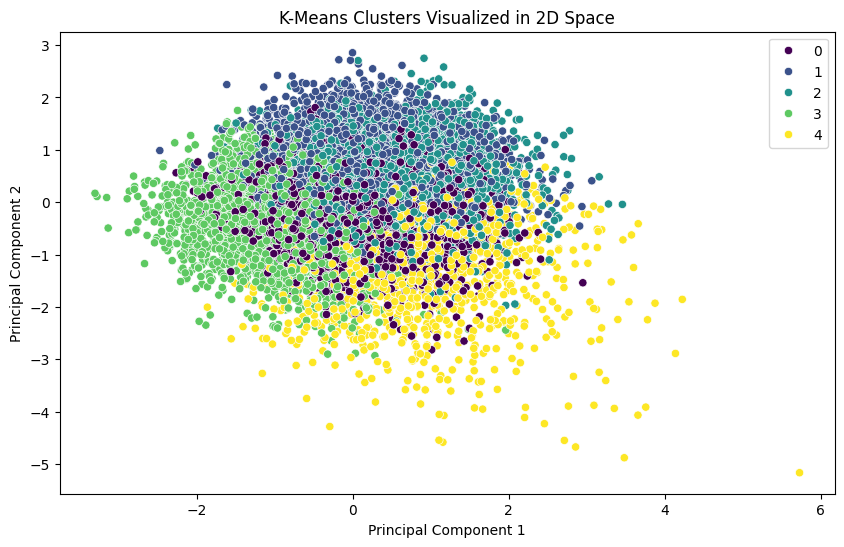

In [8]:
from sklearn.cluster import KMeans

# Fit the KMeans model
kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust n_clusters based on your dataset
kmeans_labels = kmeans.fit_predict(X_preprocessed)  # X_preprocessed is the preprocessed data

# Assign the cluster labels to the dataset
dataset_cleaned['Cluster'] = kmeans_labels

# Check the centroids of the clusters (optional)
cluster_centroids = kmeans.cluster_centers_
print(f"Cluster Centroids:\n{cluster_centroids}")

# Check the distribution of samples across clusters
cluster_distribution = dataset_cleaned['Cluster'].value_counts()
print(f"Cluster Distribution:\n{cluster_distribution}")

# Optionally, visualize the clusters using a 2D plot (e.g., first two principal components)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clusters Visualized in 2D Space")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Task 8 - Tune the hyperparameters of the K-Means clustering model to improve the fit.

The goal of this task is to optimize the number of clusters (n_clusters) for the K-Means algorithm. Use hyperparameter tuning techniques like GridSearchCV or RandomizedSearchCV to find the optimal number of clusters and any other important hyperparameters, such as initialization methods.

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Hyperparameters: {'init': 'random', 'max_iter': 300, 'n_clusters': 7, 'n_init': 10}
Optimized Cluster Distribution:
Optimized Cluster
1    1717
2    1702
0    1672
5    1375
6    1313
3    1298
4     923
Name: count, dtype: int64


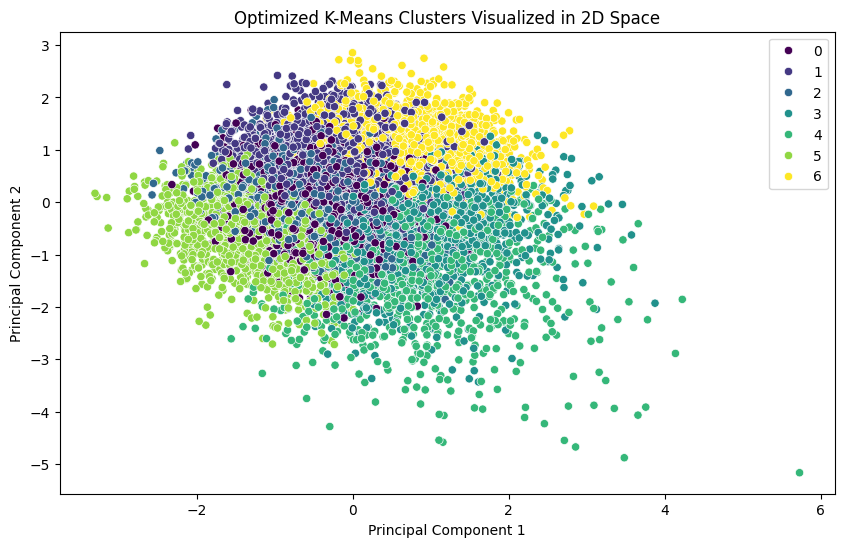

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

# Define the range of hyperparameters to tune (e.g., n_clusters, init method)
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7],  # Number of clusters to test
    'init': ['k-means++', 'random'],  # Initialization methods for centroids
    'max_iter': [300, 500],  # Maximum number of iterations
    'n_init': [10, 20],  # Number of initializations
}

# Create a KMeans model
kmeans = KMeans(random_state=42)

# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model with the dataset
grid_search.fit(X_preprocessed)

# Print the best parameters found
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Get the best estimator (model) based on the best parameters
best_kmeans = grid_search.best_estimator_

# Predict clusters using the best model
best_labels = best_kmeans.predict(X_preprocessed)

# Add the best cluster labels to the dataset
dataset_cleaned['Optimized Cluster'] = best_labels

# Check the distribution of samples across optimized clusters
optimized_cluster_distribution = dataset_cleaned['Optimized Cluster'].value_counts()
print(f"Optimized Cluster Distribution:\n{optimized_cluster_distribution}")

# Optional: Visualize the optimized clusters
X_pca_optimized = PCA(n_components=2).fit_transform(X_preprocessed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_optimized[:, 0], y=X_pca_optimized[:, 1], hue=best_labels, palette='viridis')
plt.title("Optimized K-Means Clusters Visualized in 2D Space")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Task 9 - Fit a DBSCAN

Unlike K-Means, DBSCAN does not require the number of clusters to be specified. Instead, it groups points that are closely packed together, marking points in low-density regions as outliers. You need to choose appropriate hyperparameters like eps (maximum distance between two samples for one to be considered as in the neighborhood of the other) and min_samples (the number of samples in a neighborhood for a point to be considered a core point).

DBSCAN Cluster Distribution:
DBSCAN Cluster
-1    10000
Name: count, dtype: int64


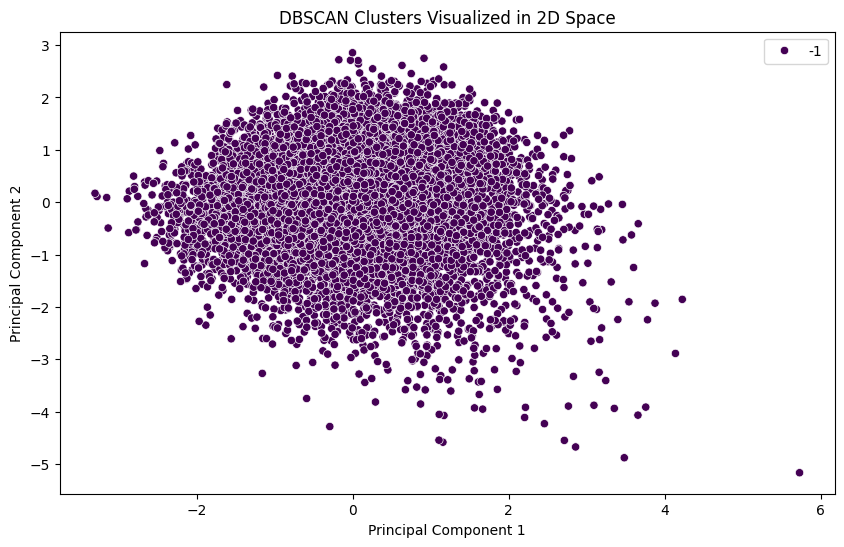

In [10]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can experiment with eps and min_samples
dbscan_labels = dbscan.fit_predict(X_preprocessed)

# Assign the DBSCAN cluster labels to the dataset
dataset_cleaned['DBSCAN Cluster'] = dbscan_labels

# Check the distribution of samples across DBSCAN clusters
dbscan_cluster_distribution = dataset_cleaned['DBSCAN Cluster'].value_counts()
print(f"DBSCAN Cluster Distribution:\n{dbscan_cluster_distribution}")

# Visualize the DBSCAN clusters
X_pca_dbscan = PCA(n_components=2).fit_transform(X_preprocessed)

# Plotting the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_dbscan[:, 0], y=X_pca_dbscan[:, 1], hue=dbscan_labels, palette='viridis', marker='o')
plt.title("DBSCAN Clusters Visualized in 2D Space")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Task 10 - Tune the hyperparameters of the DBSCAN model to improve its clustering performance.

DBSCAN has two primary hyperparameters: eps (the maximum distance between two samples to be considered as neighbors) and min_samples (the number of samples required to form a dense region). You need to tune these hyperparameters using a search method like GridSearchCV or RandomizedSearchCV to find the optimal combination that improves the clustering results.

Best Hyperparameters: None
Best Silhouette Score: -1
Cluster Distribution:
Series([], Name: count, dtype: int64)


/var/folders/3q/7l71b3q11b9fksxdghxfzf6m0000gs/T/ipykernel_65544/1739764017.py:48: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


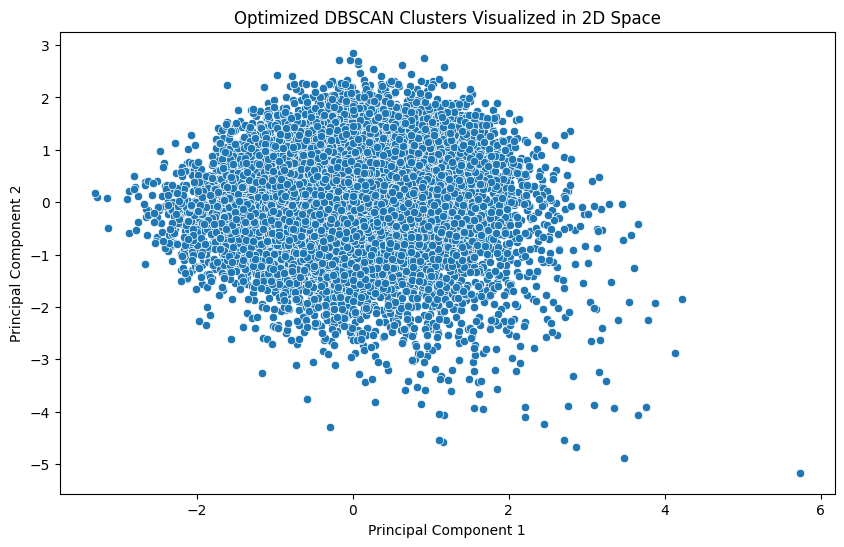

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import numpy as np

# Define the parameter grid
eps_values = np.linspace(0.1, 1.5, 15)  # Range of eps values to explore
min_samples_values = [3, 5, 10, 15]  # Range of min_samples values to explore

# Initialize variables to store the best parameters and score
best_score = -1
best_params = None
best_labels = None

# Iterate over all combinations of eps and min_samples
for eps, min_samples in product(eps_values, min_samples_values):
    # Fit DBSCAN with the current set of parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_preprocessed)
    
    # Check if there is more than one cluster
    if len(set(labels)) > 1:  # Ensure valid clustering
        score = silhouette_score(X_preprocessed, labels)  # Compute Silhouette Score
        if score > best_score:  # Update if current score is better
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples}
            best_labels = labels

# Print the best parameters and Silhouette Score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

# Assign the best labels to the dataset
dataset_cleaned['Optimized DBSCAN Cluster'] = best_labels

# Check the distribution of samples across optimized DBSCAN clusters
optimized_cluster_distribution = dataset_cleaned['Optimized DBSCAN Cluster'].value_counts()
print(f"Cluster Distribution:\n{optimized_cluster_distribution}")

# Visualize the optimized DBSCAN clusters
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X_pca_optimized_dbscan = PCA(n_components=2).fit_transform(X_preprocessed)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca_optimized_dbscan[:, 0],
    y=X_pca_optimized_dbscan[:, 1],
    hue=best_labels,
    palette='viridis'
)
plt.title("Optimized DBSCAN Clusters Visualized in 2D Space")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Task 11 - Interpret the results from clustering (K-Means or DBSCAN) and identify which clusters correspond to high-value customers.

The goal of this task is to understand the characteristics of each cluster and determine which clusters represent customers who are more likely to engage with ads and sign up for a credit card. You will analyze the features within each cluster and make decisions based on business criteria (e.g., high engagement, high purchase behavior).

Analyze Cluster Characteristics: Examine the mean values of the features for each cluster to understand the differences. This will help identify clusters that have high ad engagement, time spent on the platform, and other features associated with high-value customers.

Define High-Value Customer Criteria: Based on the cluster characteristics, define what constitutes a "high-value" customer. For example, you might decide that high engagement with ads (e.g., high Ad Engagement), high purchase behavior (e.g., Online Purchase Behavior), and higher Time Spent on Platform are indicators of a high-value customer.

Segment High-Value Customers: Identify which clusters correspond to high-value customers by looking at the features that are high in certain clusters. Flag or label these customers as high-value.

Visualize High-Value Customer Distribution: Optionally, visualize how these high-value customers are distributed across the clusters.


In [ ]:
# Step 1: Analyzing Cluster Characteristics
# Calculate the mean values of each feature for each cluster
cluster_means = dataset_cleaned.groupby('Optimized DBSCAN Cluster').mean()
print("Cluster Characteristics (mean values for each feature):")
print(cluster_means)

# Step 2: Define High-Value Customer Criteria
# High-value customers are those with high Ad Engagement, high Online Purchase Behavior, and high Time Spent on Platform
high_value_criteria = (dataset_cleaned['Ad Engagement (Clicks/Views)'] > dataset_cleaned['Ad Engagement (Clicks/Views)'].quantile(0.75)) & \
                       (dataset_cleaned['Online Purchase Behavior'] > dataset_cleaned['Online Purchase Behavior'].quantile(0.75)) & \
                       (dataset_cleaned['Time Spent on Platform (mins)'] > dataset_cleaned['Time Spent on Platform (mins)'].quantile(0.75))

# Step 3: Segment High-Value Customers
# Mark high-value customers
dataset_cleaned['High Value Customer'] = np.where(high_value_criteria, 1, 0)

# Identify which clusters contain the most high-value customers
high_value_clusters = dataset_cleaned.groupby('Optimized DBSCAN Cluster')['High Value Customer'].sum()
print("High-Value Customers by Cluster:")
print(high_value_clusters)

# Step 4: Optional Visualization of High-Value Customers
# Visualizing the high-value customers in the clusters
X_pca_high_value = PCA(n_components=2).fit_transform(X_preprocessed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_high_value[:, 0], y=X_pca_high_value[:, 1], hue=dataset_cleaned['High Value Customer'], palette='coolwarm', marker='o')
plt.title("High-Value Customers in Optimized DBSCAN Clusters Visualized in 2D Space")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


After completing this task, you should be able to identify which clusters correspond to high-value customers based on their behavior. You can then use this information to target high-value customers with relevant ads and offers, increasing the likelihood of engagement and conversion for credit card sign-ups.

This process involves interpreting clustering results, defining business-specific high-value criteria, and segmenting the customers accordingly. The optional visualization helps to understand how high-value customers are distributed across clusters.